# Analyzing networks in Python

Activate anaconda and install packages  
`conda activate py8`  
`conda install -c anaconda networkx`  
`conda install pandas`  
`conda install matplotlib`

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib, json

### House Graph example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

In [2]:
HG = nx.house_graph()

In [3]:
HG.nodes()

NodeView((0, 1, 2, 3, 4))

In [4]:
HG.edges()

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

### Visualization example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

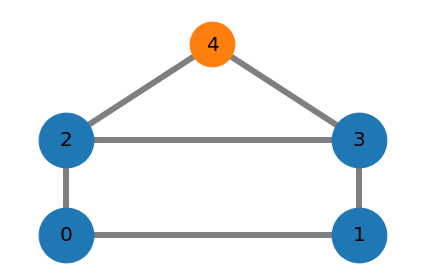

In [5]:
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}
nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color="tab:blue"
)
nx.draw_networkx_nodes(HG, pos, node_size=2000, nodelist=[4], node_color="tab:orange")
nx.draw_networkx_edges(HG, pos, alpha=0.5, width=6)
nx.draw_networkx_labels(HG, pos, font_size=20)

ax = plt.gca()
ax.margins(0.2)
plt.tight_layout()
plt.axis("off")
plt.show()

### Convert to adjacency matrix

In [107]:
nx.to_pandas_adjacency(HG)

,0,1,2,3,4
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0
3,0.0,1.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0


### Convert to node-edge list

In [123]:
nx.to_dict_of_lists(HG)

{0: [1, 2], 1: [0, 3], 2: [0, 3, 4], 3: [1, 2, 4], 4: [2, 3]}

## Metrics

In [133]:
list(nx.neighbors(HG,3))

[1, 2, 4]

In [126]:
nx.degree(HG, 0), nx.degree(HG, 3)

(2, 3)

In [128]:
nx.density(HG)

0.6

https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html#networkx.classes.function.density

In [138]:
nx.is_path(HG,[0,4]), nx.is_path(HG,[0,2,4])

(False, True)

In [10]:
nx.shortest_path(HG,0,4)

[0, 2, 4]

In [17]:
list(nx.all_shortest_paths(HG,0,4))

[[0, 2, 4]]

In [140]:
nx.degree_centrality(HG)

{0: 0.5, 1: 0.5, 2: 0.75, 3: 0.75, 4: 0.5}

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality

In [6]:
nx.betweenness_centrality(HG)

{0: 0.08333333333333333, 1: 0.08333333333333333, 2: 0.25, 3: 0.25, 4: 0.0}

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

________________________________________________

### Les Mis Graph

In [2]:
lemis_url = 'https://raw.githubusercontent.com/plotly/datasets/master/miserables.json'

In [3]:
with urllib.request.urlopen(lemis_url) as url:
    raw_data = json.loads(url.read().decode())

In [4]:
raw_data['nodes'][:5]

[{'name': 'Myriel', 'group': 1},
 {'name': 'Napoleon', 'group': 1},
 {'name': 'Mlle.Baptistine', 'group': 1},
 {'name': 'Mme.Magloire', 'group': 1},
 {'name': 'CountessdeLo', 'group': 1}]

In [5]:
raw_data['links'][:5]

[{'source': 1, 'target': 0, 'value': 1},
 {'source': 2, 'target': 0, 'value': 8},
 {'source': 3, 'target': 0, 'value': 10},
 {'source': 3, 'target': 2, 'value': 6},
 {'source': 4, 'target': 0, 'value': 1}]

In [6]:
print(len(raw_data['nodes']), len(raw_data['links']))

77 254


### From `dict` to node list

In [78]:
nodelist = list(range(len(raw_data['nodes'])))

In [39]:
nodelabels = [node_data['name'] for node_data in raw_data['nodes']]

### Go from `dict` to edge list

In [9]:
edgelist = [(link_data['source'],link_data['target']) for link_data in raw_data['links']]

In [10]:
edgelist[:5]

[(1, 0), (2, 0), (3, 0), (3, 2), (4, 0)]

### Create a graph
https://networkx.org/documentation/networkx-1.0/tutorial/tutorial.html

In [63]:
LM_G = nx.Graph()

In [64]:
LM_G.add_nodes_from(nodelist)

In [65]:
LM_G.add_edges_from(edgelist)

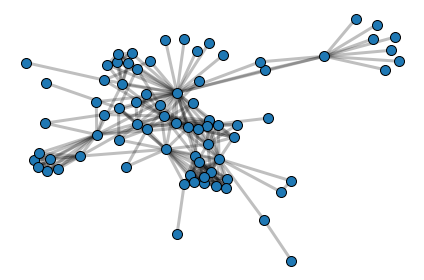

In [74]:
ax = plt.subplots()

pos = nx.spring_layout(LM_G, seed=200)
nx.draw_networkx_edges(LM_G, pos, alpha=0.25, width=3)
nx.draw_networkx_nodes(LM_G, pos, node_size=100).set_edgecolor('black')

plt.tight_layout()
plt.axis("off")
plt.show()